In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('ship_fuel_efficiency.csv')
df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [2]:
# Encoding categorical variables using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ship_type'] = le.fit_transform(df['ship_type'])
df['route_id'] = le.fit_transform(df['route_id'])
df['month'] = le.fit_transform(df['month'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['weather_conditions'] = le.fit_transform(df['weather_conditions'])

In [3]:
df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,1,3,4,132.26,1,3779.77,10625.76,2,92.14
1,NG001,1,2,3,128.52,1,4461.44,12779.73,1,92.98
2,NG001,1,2,7,67.30,1,1867.73,5353.01,0,87.61
3,NG001,1,2,0,71.68,0,2393.51,6506.52,2,87.42
4,NG001,1,1,8,134.32,1,4267.19,11617.03,0,85.61


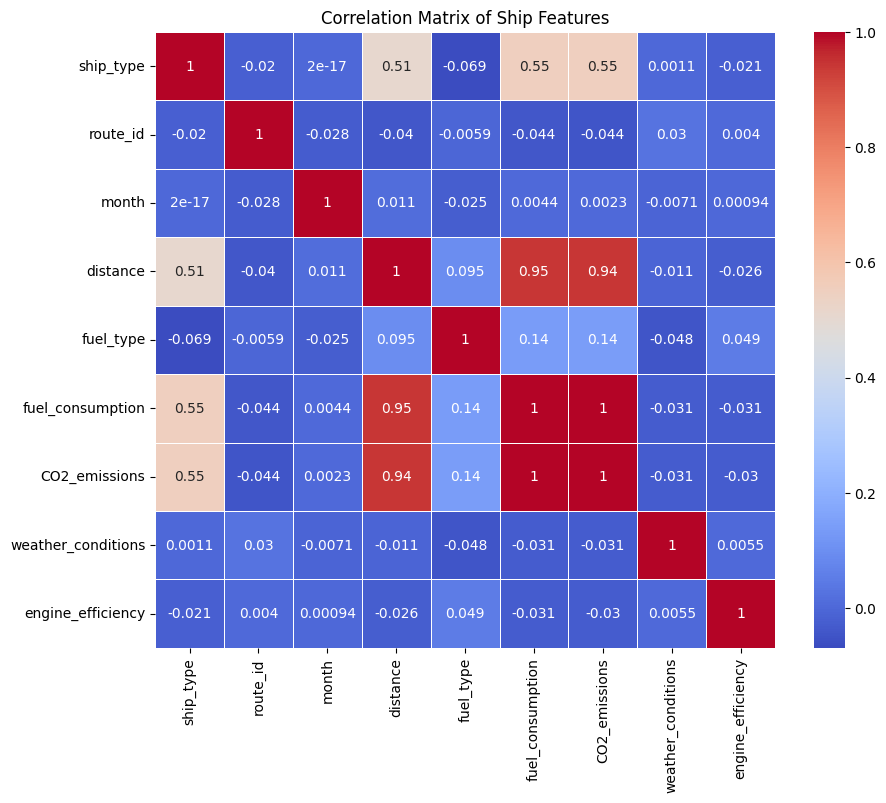

In [4]:
df = df.drop(columns=['ship_id'])

# Select relevant columns for the correlation matrix
cols = ['ship_type', 'route_id', 'month', 'distance', 'fuel_type', 'fuel_consumption', 'CO2_emissions', 'weather_conditions', 'engine_efficiency']
correlation_matrix = df[cols].apply(pd.to_numeric, errors='coerce').corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Ship Features')
plt.show()

In [5]:
# feature seperation
x = df[['ship_type', 'route_id', 'month', 'distance', 'fuel_type', 'weather_conditions', 'engine_efficiency']]
y = df['fuel_consumption']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [6]:
# Train Linear Regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

# model evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2 Score:", r2_lr)


Linear Regression MSE: 5251487.89081619
Linear Regression R2 Score: 0.7760011902635345


In [7]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest MSE: 2029863.62621265
Random Forest R2 Score: 0.9134174836441808


In [8]:
# gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 0)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

# model evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting MSE:", mse_gb)
print("Gradient Boosting R2 Score:", r2_gb)

Gradient Boosting MSE: 1934308.049054753
Gradient Boosting R2 Score: 0.9174933448081153


In [9]:
# XGBoost Model
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 0)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

# model evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost MSE:", mse_xgb)
print("XGBoost R2 Score:", r2_xgb)

XGBoost MSE: 1919334.2520763555
XGBoost R2 Score: 0.9181320424058499


In [10]:
# LightGBM Model
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, verbosity=-1)
lgbm_model.fit(x_train, y_train)
y_pred_lgbm = lgbm_model.predict(x_test)

# model evaluation
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print("LightGBM MSE:", mse_lgbm)
print("LightGBM R2 Score:", r2_lgbm)


LightGBM MSE: 1891081.426674354
LightGBM R2 Score: 0.9193371483478836


In [11]:
# Create a dictionary with the results
results = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "XGBoost", "LightGBM"],
    "MSE": [5251487.89081619, 2029863.62621265, 1934308.049054753, 1919334.2520763555, 1891081.426674354],
    "R2 Score": [0.7760011902635345, 0.9134174836441808, 0.9174933448081153, 0.9181320424058499, 0.9193371483478836]
}

# Create a DataFrame
df_results = pd.DataFrame(results)

# Print the DataFrame
df_results

,Model,MSE,R2 Score
0,Linear Regression,5.251488e+06,0.776001
1,Random Forest,2.029864e+06,0.913417
2,Gradient Boosting,1.934308e+06,0.917493
3,XGBoost,1.919334e+06,0.918132
4,LightGBM,1.891081e+06,0.919337


In [12]:
# Cross validation for LightGBM
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lgbm_model, x_train, y_train, cv=5)
print("Cross-validation scores for LightGBM: ", scores)
print("Mean cross-validation score for LightGBM: ", scores.mean())



Cross-validation scores for LightGBM:  [0.92797116 0.9099826  0.91658903 0.91434559 0.90798962]
Mean cross-validation score for LightGBM:  0.9153755980506613


In [13]:
# Cross validation for XGBoost
scores = cross_val_score(xgb_model, x_train, y_train, cv=5)
print("Cross-validation scores for XGBoost: ", scores)
print("Mean cross-validation score for XGBoost: ", scores.mean())

Cross-validation scores for XGBoost:  [0.92395416 0.91088223 0.91749968 0.91199113 0.90498487]
Mean cross-validation score for XGBoost:  0.9138624125884796


In [14]:
# Cross validation for Gradient Boosting
scores = cross_val_score(gb_model, x_train, y_train, cv=5)
print("Cross-validation scores for Gradient Boosting: ", scores)
print("Mean cross-validation score for Gradient Boosting: ", scores.mean())


Cross-validation scores for Gradient Boosting:  [0.92548767 0.91041486 0.91524454 0.90706525 0.90740395]
Mean cross-validation score for Gradient Boosting:  0.9131232548924721


In [18]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Instantiate the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=0)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    random_state=0,
    n_jobs=-1  # Use all available processors
)

# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Use the best estimator to make predictions
best_gb_model = random_search.best_estimator_
y_pred_gb = best_gb_model.predict(x_test)

# Model evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Tuned Gradient Boosting MSE:", mse_gb)
print("Tuned Gradient Boosting R2 Score:", r2_gb)

Best Parameters: {'subsample': 0.5, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 2, 'learning_rate': 0.05}
Tuned Gradient Boosting MSE: 1870555.5339395197
Tuned Gradient Boosting R2 Score: 0.9202126669888808


In [19]:
import joblib

# Save the Gradient Boosting model, StandardScaler, and PCA
joblib.dump(best_gb_model, 'model_fuel.joblib') 
joblib.dump(sc, 'scaler_fuel.joblib')  
joblib.dump(pca, 'pca_fuel.joblib')  

print("✅ Gradient Boosting model, StandardScaler, and PCA saved successfully!")

✅ Gradient Boosting model, StandardScaler, and PCA saved successfully!
